## 案例二 电影评分

In [28]:
import pandas as pd

mfile = 'datasets/movielens/movies.dat'
ufile = 'datasets/movielens/users.dat'
rfile = 'datasets/movielens/ratings.dat'

# 读电影数据文件
mtitles = ['movie_id', 'name', 'type']
movies = pd.read_table(mfile, names=mtitles, sep='::')

# 读用户数据文件
utitles = ['user_id', 'sex', 'age', 'job', 'zip']
users =  pd.read_table(ufile, names=utitles, sep='::')

# 读评分文件
rtitles = ['user_id', 'movie_id', 'score', 'timestamp']
scores = pd.read_table(rfile, names=rtitles, sep='::')

/Users/panliu/.local/share/virtualenvs/pydata-book-oZ7iJid9/lib/python3.7/site-packages/ipykernel_launcher.py:9: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  if __name__ == '__main__':
/Users/panliu/.local/share/virtualenvs/pydata-book-oZ7iJid9/lib/python3.7/site-packages/ipykernel_launcher.py:13: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  del sys.path[0]
/Users/panliu/.local/share/virtualenvs/pydata-book-oZ7iJid9/lib/python3.7/site-packages/ipykernel_launcher.py:17: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and d

## 目标一：统计每部电影在男女分数中的比例 

sex,F,M
name,,
"$1,000,000 Duck (1971)",0.55,0.45
'Night Mother (1986),0.50,0.50
'Til There Was You (1997),0.50,0.50
"'burbs, The (1989)",0.49,0.51
...And Justice for All (1979),0.51,0.49
...,...,...
"Zed & Two Noughts, A (1985)",0.51,0.49
Zero Effect (1998),0.51,0.49
Zero Kelvin (Kj�rlighetens kj�tere) (1995),0.00,1.00


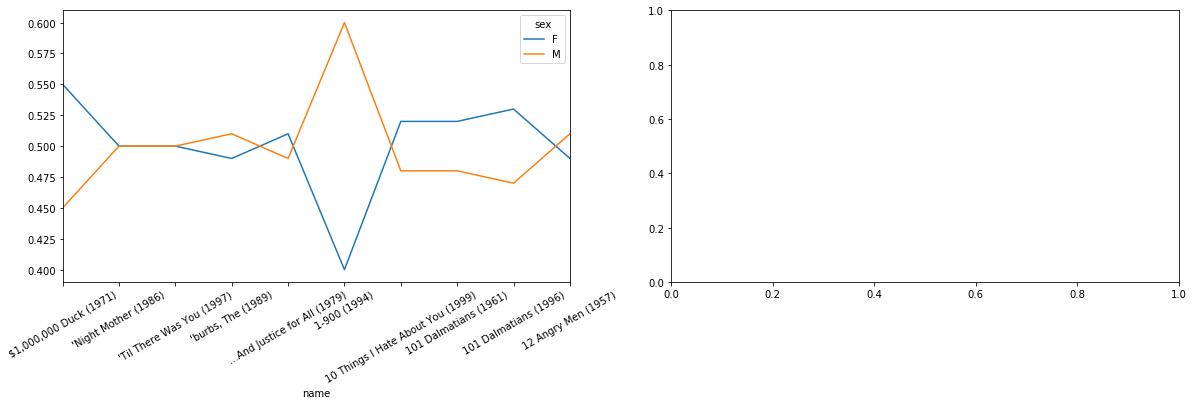

In [42]:
import numpy as np
import matplotlib.pyplot as plt
plt.rc('figure', figsize=(20, 5))

df1 = pd.merge(pd.merge(users, scores), movies)
df2 = df1[['name', 'sex', 'age', 'score']]
'''
name        F   M
One Flew    50  90
Broken Ves  90  56
'''
'''
name        score
One Flow    F  50
            M  90
Broken Ves  F  90
            M  56
'''
def func_group(group):
    return np.around(group['score'].mean(), 2)
df3 = df2.groupby(['name', 'sex']).apply(func_group)
df4 = df3.unstack()

# 求f和m列各自的百分比
def func_percent(x):
    return x / x.sum()
# 对百分比保留2位小数
df5 = np.around(df4.apply(func_percent, axis = 1), 2)
# 填充缺失值Na为0
df6 = df5.fillna(0)

# 对每一行求和
df6.sum(axis = 1)

# 绘制图形
fig, axes = plt.subplots(1, 2)
df6[:10].plot.line(rot=30, ax=axes[0])

df6

## 目标二：统计男女分歧最大的电影Top10
#### 统计男性最喜欢的电影Top10
#### 统计女性对喜欢的电影Top10

In [47]:
df6['diff'] = df6['F'] - df6['M']
df6.sort_values(by='diff', ascending=False)

sex,F,M,diff
name,,,
Nemesis 2: Nebula (1995),1.0,0.0,1.0
Cheetah (1989),1.0,0.0,1.0
"Little Indian, Big City (Un indien dans la ville) (1994)",1.0,0.0,1.0
"First Love, Last Rites (1997)",1.0,0.0,1.0
For Ever Mozart (1996),1.0,0.0,1.0
...,...,...,...
Vampyros Lesbos (Las Vampiras) (1970),0.0,1.0,-1.0
American Strays (1996),0.0,1.0,-1.0
Bitter Sugar (Azucar Amargo) (1996),0.0,1.0,-1.0


### 透视表函数

In [61]:
df2
'''
# 第一个参数：你对哪一列进行计算
# 第二个参数：index='列名'，指定哪个列作为索引
# 第三个参数：columns=['列名1','列名2']，指定哪些做为列
# 第四个参数：aggfunc=''，做什么计算，比如：求和sum，求平均mean
            也可以是自定义函数
'''
print(df4)
def pivot_func(x):
    return np.around(x.mean(), 2)
# df2.pivot_table('score', index='name', columns=['sex'], aggfunc='mean')
# 以name作为索引，以性别作为列，对分数求平均
df2.pivot_table('score', index='name', columns=['sex'], aggfunc=pivot_func)

sex                                            F     M
name                                                  
$1,000,000 Duck (1971)                      3.38  2.76
'Night Mother (1986)                        3.39  3.35
'Til There Was You (1997)                   2.68  2.73
'burbs, The (1989)                          2.79  2.96
...And Justice for All (1979)               3.83  3.69
...                                          ...   ...
Zed & Two Noughts, A (1985)                 3.50  3.38
Zero Effect (1998)                          3.86  3.72
Zero Kelvin (Kj�rlighetens kj�tere) (1995)   NaN  3.50
Zeus and Roxanne (1997)                     2.78  2.36
eXistenZ (1999)                             3.10  3.29

[3706 rows x 2 columns]


sex,F,M
name,,
"$1,000,000 Duck (1971)",3.38,2.76
'Night Mother (1986),3.39,3.35
'Til There Was You (1997),2.68,2.73
"'burbs, The (1989)",2.79,2.96
...And Justice for All (1979),3.83,3.69
...,...,...
"Zed & Two Noughts, A (1985)",3.50,3.38
Zero Effect (1998),3.86,3.72
Zero Kelvin (Kj�rlighetens kj�tere) (1995),NaN,3.50
